In [60]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# EukMetaSanity Bug

In [88]:
old = pd.read_csv('/vortexfs1/omics/alexander/halexander/2020-05-euk-abund/metaeuk/eukcc/all_tsv.old', sep='\t')
old = old[old.groupby('file')['completeness'].transform(max)== old['completeness']].set_index('file')
old.index =  old.index.str.strip('.all.maker.proteins')

new = pd.read_csv('/vortexfs1/scratch/halexander/2020-eukms-annotate/old-eukcc/all_tsv.new', sep='\t')

new = new[new.groupby('file')['completeness'].transform(max)== new['completeness']].set_index('file')


<AxesSubplot:xlabel='contamination_x', ylabel='contamination_y'>

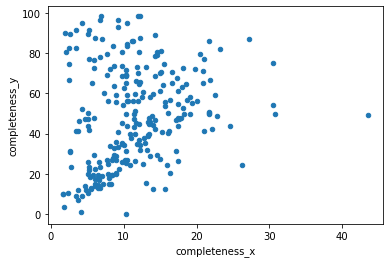

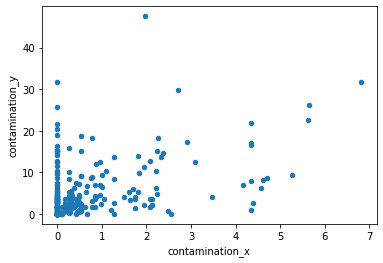

In [90]:
merged = new.merge(old, left_index=True, right_index=True, how='inner')
merged.plot('completeness_x', 'completeness_y', kind='scatter')
merged.plot('contamination_x', 'contamination_y', kind='scatter')

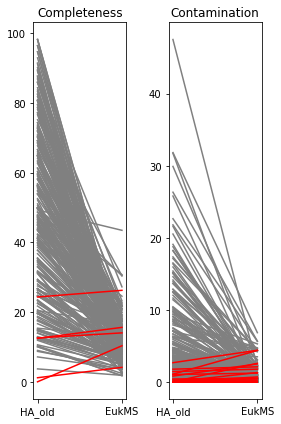

In [81]:
fig, axs = plt.subplots(1,2, figsize= [4,6])
ax = axs[0]
subset_1 = merged[merged['completeness_y'] >  merged['completeness_x']]
subset_2 = merged[merged['completeness_y'] <=  merged['completeness_x']]
subset_1[['completeness_y', 'completeness_x']].T.plot(legend=False, color='gray', ax = ax)
subset_2[['completeness_y', 'completeness_x']].T.plot(legend=False, color='r', ax = ax)
ax.set_xticks([0,1])
ax.set_xticklabels(['HA_old', 'EukMS'])
ax.set_title('Completeness')
ax = axs[1]
subset_3 = merged[merged['contamination_y'] >  merged['contamination_x']]
subset_4 = merged[merged['contamination_y'] <=  merged['contamination_x']]
subset_3[['contamination_y', 'contamination_x']].T.plot(legend=False, color='gray', ax = ax)
subset_4[['contamination_y', 'contamination_x']].T.plot(legend=False, color='r', ax = ax)
ax.set_xticks([0,1])
ax.set_xticklabels(['HA_old', 'EukMS'])

ax.set_title('Contamination')
fig.tight_layout()

# Fixed EukMS Bug 

In [110]:
nbuscos = 255
eukms_df = pd.read_csv('/vortexfs1/scratch/halexander/2020-eukms-annotate/busco-update-2021-01-12.tsv', sep = '\t',index_col=0)
ha_df = pd.read_csv('/vortexfs1/omics/alexander/halexander/2020-05-euk-abund/metaeuk/busco-report.tsv', sep = '\t',index_col=0)

eukms_df['completeness'] = (eukms_df.Complete_ALL/nbuscos)*100
eukms_df['contamination'] = (eukms_df.Complete_Duplciated/nbuscos)*100
ha_df['completeness'] = (ha_df.Complete_ALL/nbuscos)*100
ha_df['contamination'] = (ha_df.Complete_Duplciated/nbuscos)*100


In [111]:
merged = ha_df.merge(eukms_df, left_index=True, right_index=True, suffixes=('_ha', '_EukMS'),)

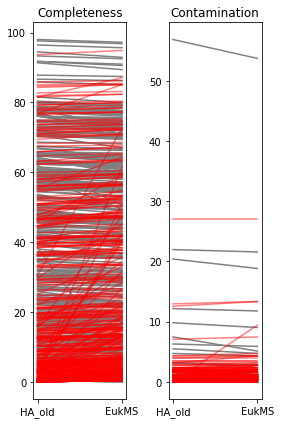

In [119]:
fig, axs = plt.subplots(1,2, figsize= [4,6])
ax = axs[0]
subset_1 = merged[merged['completeness_ha'] >  merged['completeness_EukMS']]
subset_2 = merged[merged['completeness_ha'] <  merged['completeness_EukMS']]
subset_1[['completeness_ha', 'completeness_EukMS']].T.plot(legend=False, color='gray', ax = ax)
subset_2[['completeness_ha', 'completeness_EukMS']].T.plot(legend=False, color='r', ax = ax, alpha = 0.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['HA_old', 'EukMS'])
ax.set_title('Completeness')
ax = axs[1]
subset_3 = merged[merged['contamination_ha'] >  merged['contamination_EukMS']]
subset_4 = merged[merged['contamination_ha'] <=  merged['contamination_EukMS']]
subset_3[['contamination_ha', 'contamination_EukMS']].T.plot(legend=False, color='gray', ax = ax)
subset_4[['contamination_ha', 'contamination_EukMS']].T.plot(legend=False, color='r', ax = ax, alpha = 0.5)
ax.set_xticks([0,1])
ax.set_xticklabels(['HA_old', 'EukMS'])

ax.set_title('Contamination')
fig.tight_layout()

In [120]:
print(len(subset_1))

347


In [121]:
print(len(subset_2))

393


In [122]:
subset_2a = merged[merged['completeness_ha'] ==  merged['completeness_EukMS']]


In [123]:
print(len(subset_2a))

243
